# Featurization, Model Selection and Tuning on Concrete dataset

Data Description : The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Objective : Modeling of strength of high performance concrete using Machine Learning

In [1]:
#import data processing packages
import pandas as pd
import numpy as np

#import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression

# import scipy libraries
from scipy.spatial.distance import cdist
from scipy.stats import zscore

### Load the data

In [2]:
concrete_data = pd.read_csv("concrete.csv")

## 1. Exploratory data analysis

In [3]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete_data.shape

(1030, 9)

The data has 1030 records and 9 columns.

In [5]:
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [6]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are 8 predictors - all are numeric attributes.
Target attribute is 'strength'

Since we need to estimate the value of 'strength', the problem is of regression type.

#### Check for duplicate records

In [7]:
repeated_records = concrete_data.duplicated()
print('Total number of repeated records :',sum(repeated_records))

Total number of repeated records : 25


In [8]:
concrete_data_orginal = concrete_data.copy()

In [9]:
concrete_data = concrete_data.drop_duplicates(keep="first")

In [10]:
concrete_data.shape

(1005, 9)

After dropping duplicates, we have 1005 records in the data. 

#### Split into independent and dependent variables

In [11]:
X = concrete_data.drop("strength", axis=1)
y = concrete_data['strength']

### 1a. Univariate Analysis 

#### Look at the average, standard deviation, min, max and quartile values for each attribute

The mean value of the attribute describes the average value in data

The min and max define the range of the attribute

The first and third quartile are determined from 25% and 75% respectively

The median value is determined by value at 50%

In [12]:
concrete_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


#### Check for missing values in the data

In [13]:
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values in the data.

#### Understanding the distribution of attributes

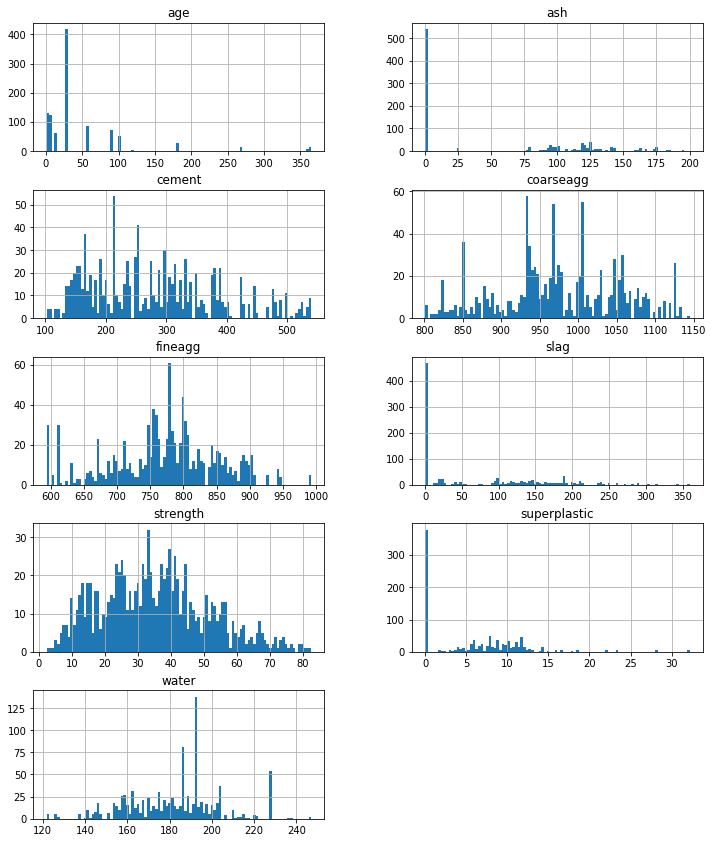

In [14]:
concrete_data.hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

#### Distribution plots for univariate analysis

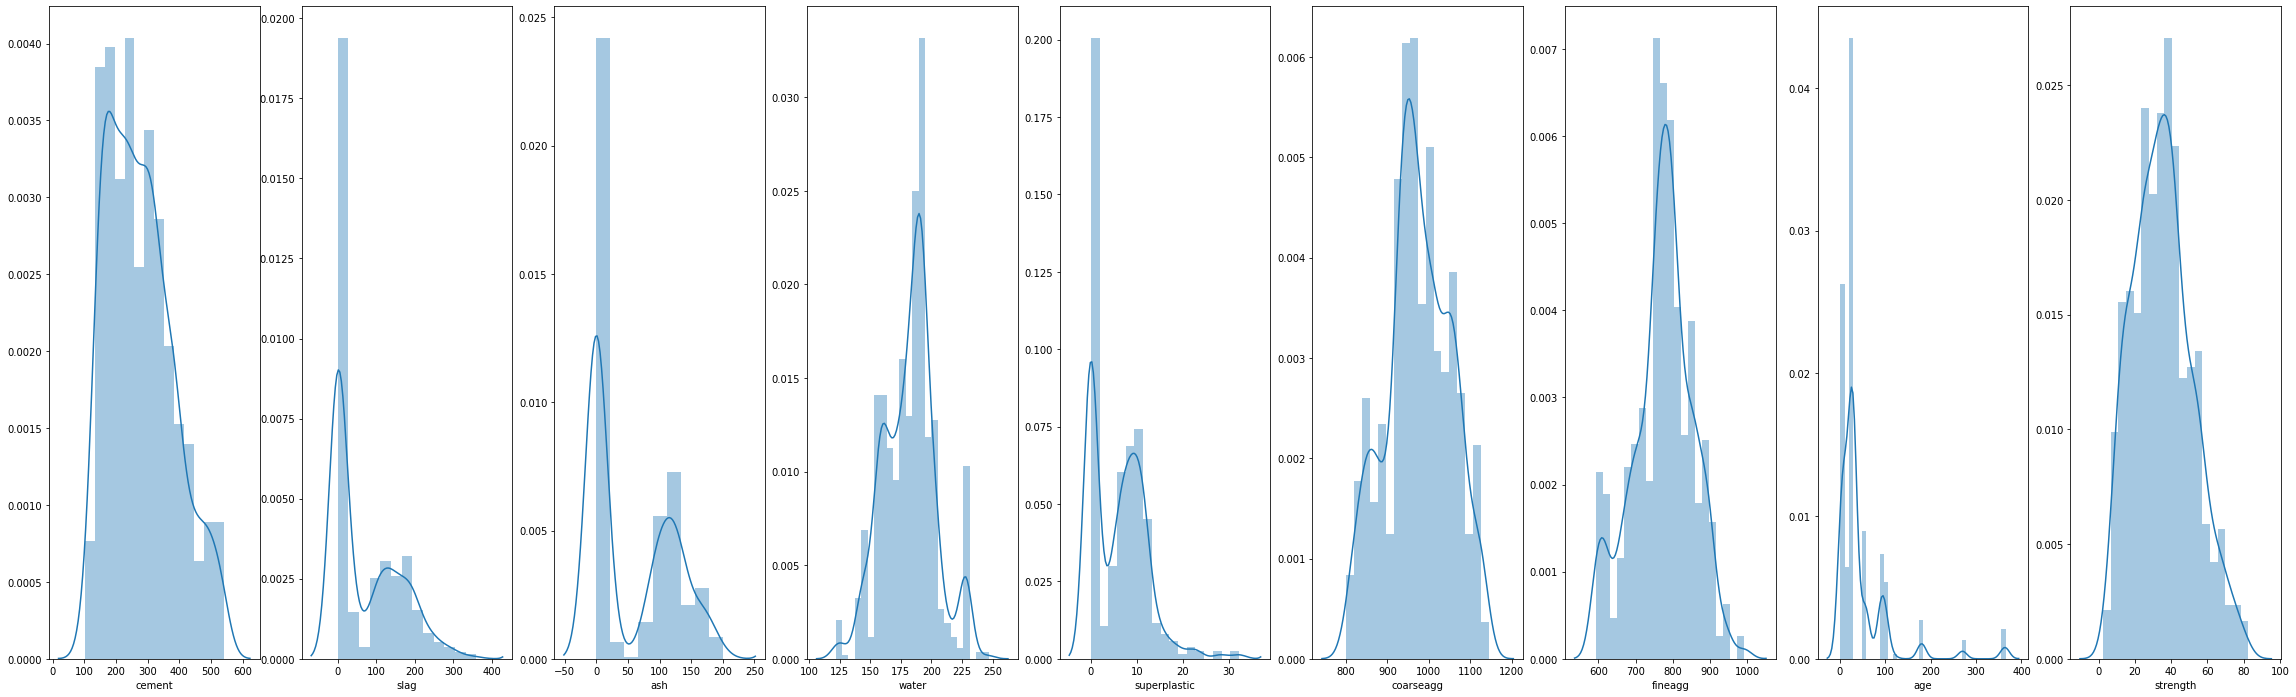

In [15]:
fig, ax = plt.subplots(1,9,figsize=(40,12)) 

sns.distplot(concrete_data['cement'],ax=ax[0])

sns.distplot(concrete_data['slag'],ax=ax[1])

sns.distplot(concrete_data['ash'],ax=ax[2])

sns.distplot(concrete_data['water'],ax=ax[3])

sns.distplot(concrete_data['superplastic'],ax=ax[4])

sns.distplot(concrete_data['coarseagg'],ax=ax[5])

sns.distplot(concrete_data['fineagg'],ax=ax[6])

sns.distplot(concrete_data['age'],ax=ax[7])

sns.distplot(concrete_data['strength'],ax=ax[8])

#### Takeaways :
1. None of the attributes have a normal distribution. 
2. There are multiple Gaussians for most of the attributes.

#### Check for outliers using Boxplot

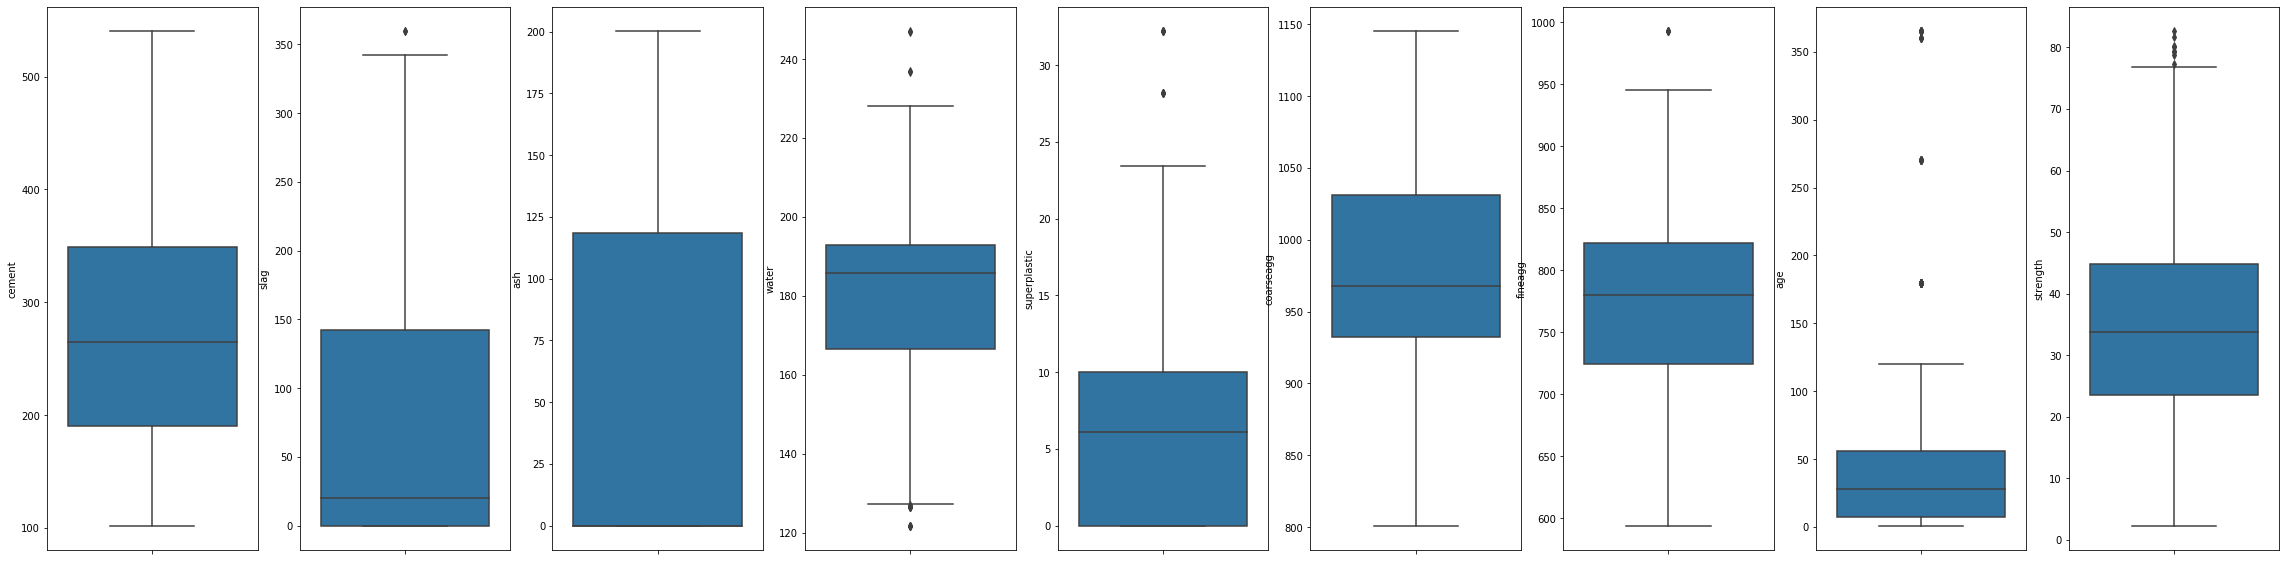

In [16]:
fig, ax = plt.subplots(1,9,figsize=(40,10)) 

sns.boxplot(x='cement',data=concrete_data,ax=ax[0],orient='v')

sns.boxplot(x='slag',data=concrete_data,ax=ax[1],orient='v')

sns.boxplot(x='ash',data=concrete_data,ax=ax[2],orient='v')

sns.boxplot(x='water',data=concrete_data,ax=ax[3],orient='v')

sns.boxplot(x='superplastic',data=concrete_data,ax=ax[4],orient='v')

sns.boxplot(x='coarseagg',data=concrete_data,ax=ax[5],orient='v')

sns.boxplot(x='fineagg',data=concrete_data,ax=ax[6],orient='v')

sns.boxplot(x='age',data=concrete_data,ax=ax[7],orient='v')

sns.boxplot(x='strength',data=concrete_data,ax=ax[8],orient='v')

#### Takeaway :
1. Some attributes have outliers.
2. Slag, Water, Superplastic, finagg, age and strength have significant outliers in the data. 

### 1b. Multivariate Analysis
#### Bivariate analysis using Pairplot

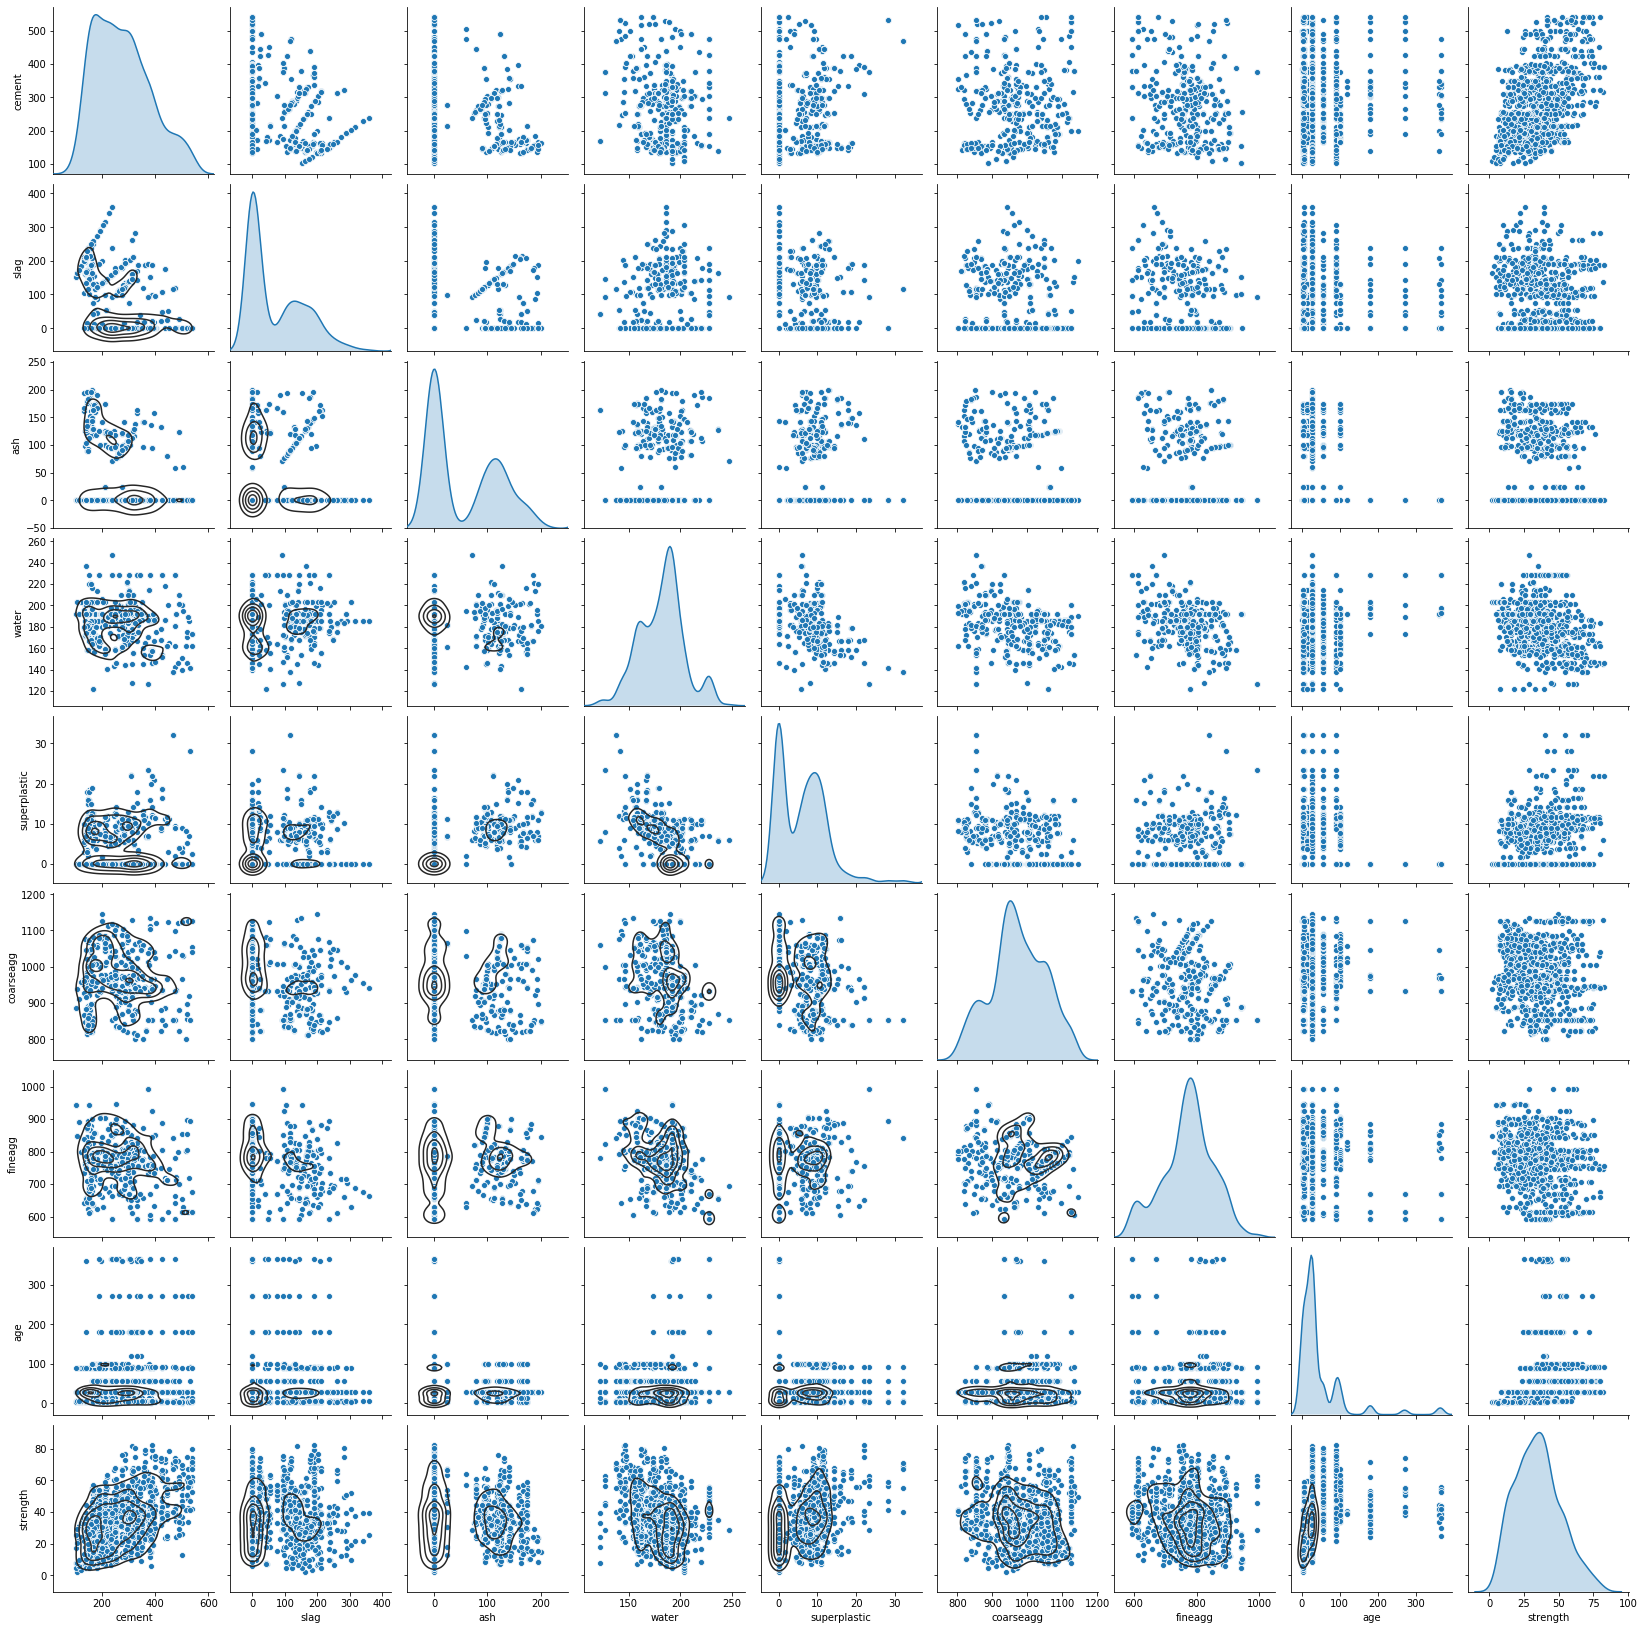

In [17]:
sns.pairplot(concrete_data, diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

#### Takeaway :
1. There is no clear correlation between the attributes.
2. The data has many Gaussians and can be subdivided into groups/clusters.
3. Only cement seems to have a clear positive correlation with strength. 

#### Correlation Analysis

In [18]:
# get correlation
corr = concrete_data.corr()
print(corr)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.303324 -0.385610 -0.056625      0.060906  -0.086205   
slag         -0.303324  1.000000 -0.312352  0.130262      0.019800  -0.277559   
ash          -0.385610 -0.312352  1.000000 -0.283314      0.414213  -0.026468   
water        -0.056625  0.130262 -0.283314  1.000000     -0.646946  -0.212480   
superplastic  0.060906  0.019800  0.414213 -0.646946      1.000000  -0.241721   
coarseagg    -0.086205 -0.277559 -0.026468 -0.212480     -0.241721   1.000000   
fineagg      -0.245375 -0.289685  0.090262 -0.444915      0.207993  -0.162187   
age           0.086348 -0.042759 -0.158940  0.279284     -0.194076  -0.005264   
strength      0.488283  0.103374 -0.080648 -0.269624      0.344209  -0.144717   

               fineagg       age  strength  
cement       -0.245375  0.086348  0.488283  
slag         -0.289685 -0.042759  0.103374  
ash           0.090262 -0.158940 -0.080648  
water    

In [19]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

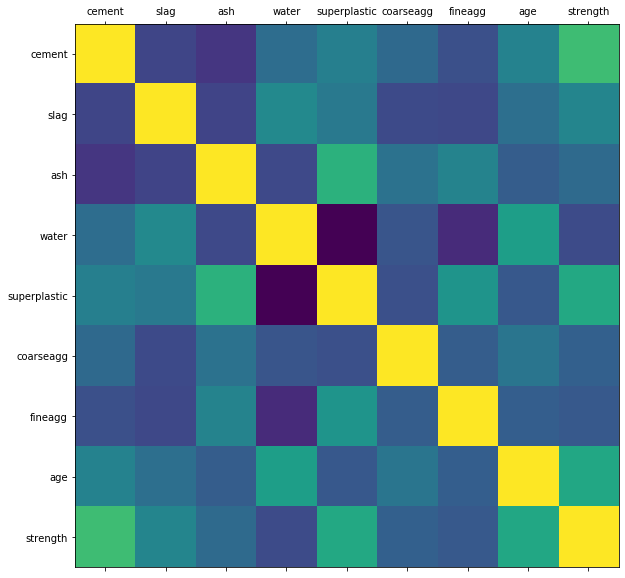

In [20]:
plot_corr(concrete_data)

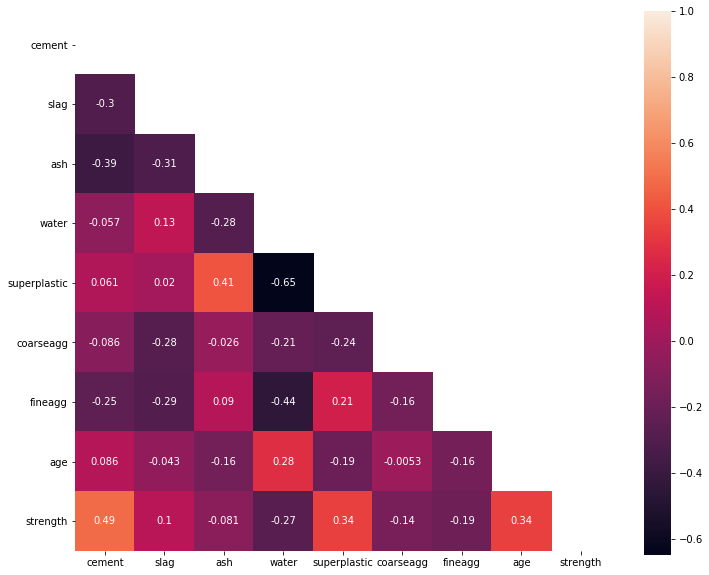

In [21]:
mask_corr = np.zeros_like(corr)
mask_corr[np.triu_indices_from(mask_corr)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask_corr,annot=True,square=True)

#### Takeaway :
1. There is no significant correlation between the attributes.
2. Ash does not seem to have a lot of correlation with any attribute.
3. Cement is the most positively correlated to strength.
4. Water has a negative correlation with strength, i.e., more water means less strength.

#### Density and Box plots consolidated

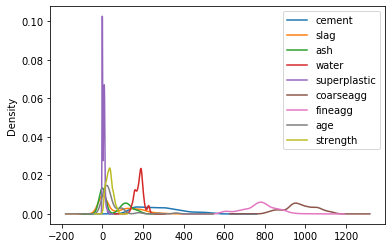

In [22]:
concrete_data.plot(kind='density', subplots=False, layout=(10,5), sharex=False, sharey=False)

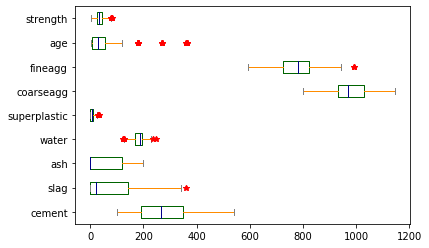

In [23]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
concrete_data.plot(kind='box', subplots=False, color=color, sharex=False, sharey=False,sym='r*', vert=False)

#### Multivariate analysis using Scatterplot

#### Analyzing Strength with Cement, Age, Water

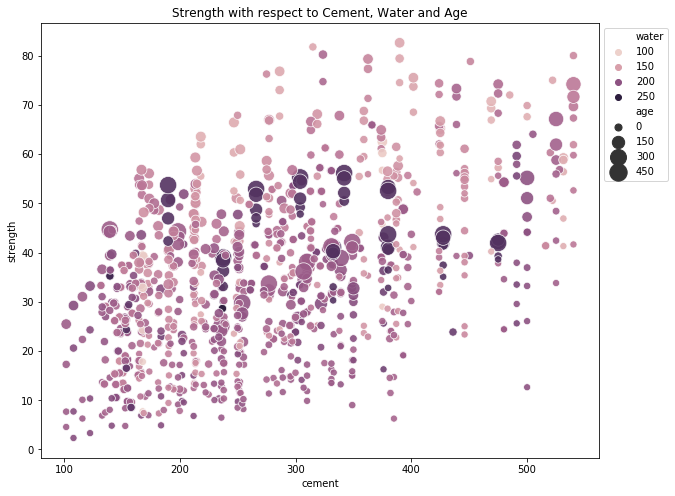

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=concrete_data, ax=ax, sizes=(50, 300),
                alpha=0.9)
ax.set_title("Strength with respect to Cement, Water and Age")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Takeaway :
1. Age has a positive relationship with strength. Higher age means more strength
2. Strength increases with more cement and less water values. 

#### Analyzing Strength with Coarseagg, Superplastic, Ash

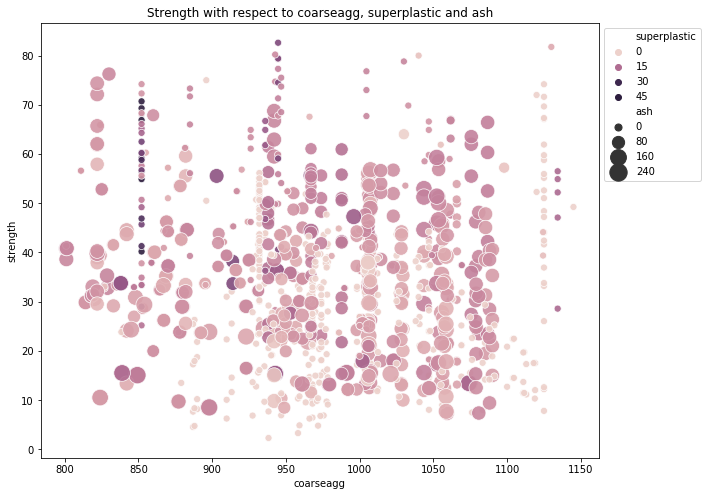

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="coarseagg", hue="superplastic", size="ash", data=concrete_data, ax=ax, sizes=(50, 300),
                alpha=0.9)
ax.set_title("Strength with respect to coarseagg, superplastic and ash")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Takeaway :
1. Ash does not have a significant relation with strength
2. Strength does not increase much with higher superplastic value

### 1c. Handling Missing values and Outliers

There are no missing values in the data.

However, there are outliers in the data. We can remove the outliers by analyzing the interquartile range. 

In [26]:
def impute_outlier(data, col_names):
    for i in col_names:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        data[i][data[i] < (Q1 - 1.5 * IQR)] = np.nan
        data[i][data[i] > (Q3 + 1.5 * IQR)] = np.nan
    return data

In [27]:
pd.options.mode.chained_assignment = None  # default='warn'
concrete_data_outlier = concrete_data.copy(deep=True)
impute_outlier(concrete_data_outlier, col_names = concrete_data.drop("strength", axis=1).columns)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,NaN,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,NaN,55.06


In [28]:
concrete_data_outlier.isnull().sum()

cement           0
slag             2
ash              0
water           15
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         0
dtype: int64

In [29]:
concrete_data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1003 non-null   float64
 2   ash           1005 non-null   float64
 3   water         990 non-null    float64
 4   superplastic  995 non-null    float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1000 non-null   float64
 7   age           946 non-null    float64
 8   strength      1005 non-null   float64
dtypes: float64(9)
memory usage: 78.5 KB


#### Impute the missing values (Outliers in this case) with Median

In [30]:
medianFiller = lambda x: x.fillna(x.median())
concrete_data_imputed = concrete_data_outlier.apply(medianFiller,axis=0)
concrete_data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   float64
 8   strength      1005 non-null   float64
dtypes: float64(9)
memory usage: 78.5 KB


In [31]:
concrete_data_imputed.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


## 2. Feature Engineering Techniques

### 2a. Opportunities for feature derivation

#### There are two attributes which can be derived from the attributes that contribute to the strength of concrete.
1. cement to water ratio
2. coarseagg to fineagg ratio

In [32]:
concrete_data_fe = concrete_data_imputed.copy(deep=True)

In [33]:
concrete_data_fe['cement/water'] = concrete_data_fe['cement'] / concrete_data_fe['water']

In [34]:
concrete_data_fe['coarse/fine'] = concrete_data_fe['coarseagg'] / concrete_data_fe['fineagg']

In [35]:
concrete_data_fe.shape

(1005, 11)

There are 11 features in the data now. 

#### Analyze the importance of new features in data

#### Split into independent and dependent

In [36]:
X_fe = concrete_data_fe.drop("strength", axis=1)
y_fe = concrete_data_fe['strength']

#### Split into train and test sets

In [37]:
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=1)

#### Identify top performing features by using 'SelectKBest'

In [38]:
def select_best_features(X_train, y_train, X_test):
    
    # Using SelectKBest, identify importance scores of features
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#### Get feature importances for all features in data

Feature cement: 264.350566
Feature slag: 9.652247
Feature ash: 12.640837
Feature water: 49.533217
Feature superplastic: 71.635981
Feature coarseagg: 16.554462
Feature fineagg: 34.546067
Feature age: 241.938908
Feature cement/water: 344.143105
Feature coarse/fine: 5.761562


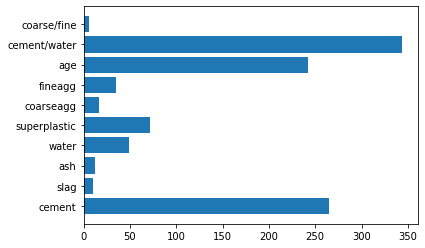

In [39]:
X_train_fs, X_test_fs, fs = select_best_features(X_train_fe, y_train_fe, X_test_fe)
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X_fe.columns[i], fs.scores_[i]))
# plot the scores
plt.barh([X_fe.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### From the feature importance scores, we can see that feature 'ash' and 'slag' do not seem to contribute a lot to the prediction.
#### From the correlation analysis, we had found that 'ash' does not have a good correlation with any other attribute. 
#### Therefore, 'ash' can be dropped from the data. 
#### The derivation of 'cement/water' feature has contributed the most to the model. 
#### However, the feature derivation 'coarse/fine' is not useful. We need not perform this derivation. 

In [40]:
concrete_data_imputed_org = concrete_data_imputed.copy(deep=True)

In [41]:
concrete_data_imputed['cement/water'] = concrete_data_imputed['cement'] / concrete_data_imputed['water']

In [42]:
concrete_data_imputed = concrete_data_imputed.drop('ash', axis=1)

### Another approach to reduce features is through dimensionality reduction. 

#### We need to scale the data for PCA

In [43]:
concrete_data_scaled = concrete_data_imputed.apply(zscore)
X_scaled=concrete_data_scaled.drop('strength',axis=1)

#### Create the covariance matrix

In [44]:
covMatrix = np.cov(X_scaled,rowvar=False)

#### Perform PCA

In [45]:
pca = PCA(n_components=8)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
#Computing the eigen Values
print(pca.explained_variance_)

[2.25189553 1.80701898 1.34072306 1.0034707  0.98929621 0.50733982
 0.10236048 0.00586335]


In [47]:
#Eigen Vectors
print(pca.components_)

[[ 5.45240215e-01 -3.29010537e-01 -3.79446527e-01  2.46958717e-01
   2.86627014e-02  6.16537131e-02  4.55489925e-03  6.20365555e-01]
 [ 4.05811890e-01  3.47430095e-02  5.22150929e-01 -4.61756721e-01
  -4.43283923e-03 -5.35097341e-01 -1.17695178e-01  2.19198088e-01]
 [ 8.90905316e-02  5.69782430e-01  6.36738481e-03  4.02867790e-01
  -6.76358002e-01 -1.65851857e-01 -8.18926165e-02  1.15734496e-01]
 [-7.98898835e-02  3.56067126e-01 -2.88939270e-01  2.84407018e-01
   5.89979314e-01 -5.88935620e-01  8.68316377e-02 -2.58918322e-04]
 [ 5.82302936e-02 -1.22562663e-02  1.20172423e-01 -5.31116747e-03
  -1.10062136e-01 -4.20598833e-02  9.83721217e-01  1.99814194e-02]
 [-9.33646141e-02 -6.03616682e-01  3.19035323e-01  5.66973968e-01
  -1.21507270e-01 -3.65844777e-01 -6.25484685e-02 -2.26203899e-01]
 [-2.52011182e-01 -2.71683008e-01 -5.76717870e-01 -4.01199398e-01
  -4.07797660e-01 -4.46989745e-01  1.61477969e-02 -5.24855657e-02]
 [-6.69397451e-01 -2.81815872e-02  2.25884584e-01  1.23963371e-02
   

In [48]:
# Explained Variance Ratio
print(pca.explained_variance_ratio_)

[0.28120686 0.22565262 0.16742363 0.12530903 0.12353898 0.06335438
 0.01278233 0.00073219]


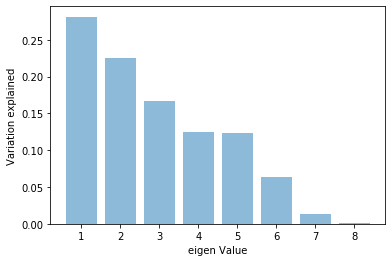

In [49]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Reduce the dimensions by analyzing the cumalative variation

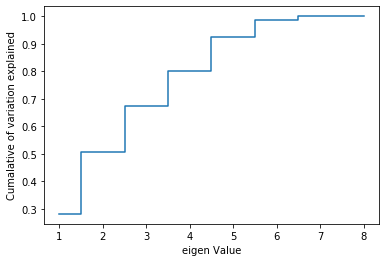

In [50]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumalative of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Only 6 components are able to explain over 95% of the variance.

In [51]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
X_pca = pca6.transform(X_scaled)
y = concrete_data_scaled['strength']

[[ 5.45240215e-01 -3.29010537e-01 -3.79446527e-01  2.46958717e-01
   2.86627014e-02  6.16537131e-02  4.55489925e-03  6.20365555e-01]
 [ 4.05811890e-01  3.47430095e-02  5.22150929e-01 -4.61756721e-01
  -4.43283923e-03 -5.35097341e-01 -1.17695178e-01  2.19198088e-01]
 [ 8.90905316e-02  5.69782430e-01  6.36738481e-03  4.02867790e-01
  -6.76358002e-01 -1.65851857e-01 -8.18926165e-02  1.15734496e-01]
 [-7.98898835e-02  3.56067126e-01 -2.88939270e-01  2.84407018e-01
   5.89979314e-01 -5.88935620e-01  8.68316377e-02 -2.58918322e-04]
 [ 5.82302936e-02 -1.22562663e-02  1.20172423e-01 -5.31116747e-03
  -1.10062136e-01 -4.20598833e-02  9.83721217e-01  1.99814194e-02]
 [-9.33646141e-02 -6.03616682e-01  3.19035323e-01  5.66973968e-01
  -1.21507270e-01 -3.65844777e-01 -6.25484685e-02 -2.26203899e-01]]
[0.28120686 0.22565262 0.16742363 0.12530903 0.12353898 0.06335438]


### 2b. Decide on complexity of model

1. By looking at the data, a simple linear model would be a good start point. 
2. We can also look at other algorithms such as Ridge Regression, Lasso Regression, Decision Tree, Random Forest and Gradient Boosting. 
3. We can also explore Polynomial regression with a higher degree of freedom. 
4. Using dimensionality reduction (PCA), we can explore the performance of Linear regression to see if we get better results. 

### 2c. Explore for Gaussians in the data

There are no Normal Distributions in any of the attributes.
Most of the attributes have around 3-4 gaussians in the data.

We can explore these groups by using clustering. 

In [52]:
concrete_data_kmeans = concrete_data_scaled.copy(deep=True)

#### Perform K-Means clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

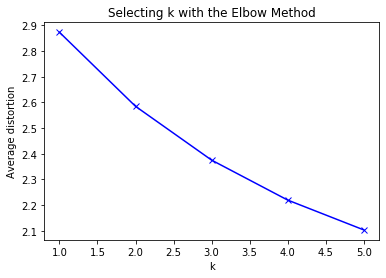

In [53]:
clusters=range(1,6)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(concrete_data_kmeans)
    prediction=model.predict(concrete_data_kmeans)
    meanDistortions.append(sum(np.min(cdist(concrete_data_kmeans, model.cluster_centers_, 'euclidean'), axis=1)) / concrete_data_kmeans.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Takeaway :
There is a slight bend at 3, which suggest that 3 is a good cluster count for the data.

In [54]:
# With K = 3
final_model=KMeans(3)
final_model.fit(concrete_data_kmeans)
prediction=final_model.predict(concrete_data_kmeans)

#Append the prediction 
concrete_data_kmeans["Group"] = prediction
concrete_data_kmeans["Group"] = prediction

concrete_data_kmeans.head()

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength,cement/water,Group
0,-1.316792,1.650657,1.043488,-1.073740,-0.033232,-0.293557,-0.148903,-0.329328,-1.352354,0
1,-1.052152,-0.342358,-1.204851,0.928248,1.372475,0.311909,-0.655204,-0.721299,-0.764218,2
2,-0.274530,-0.837677,0.242642,-0.054209,-0.225388,1.136968,-0.148903,-0.370491,-0.342650,2
3,-0.121115,0.500389,2.262168,-1.073740,-0.546508,-1.289973,-0.148903,0.651214,-0.606842,0
4,-1.187348,1.314966,0.536120,0.613121,0.941736,-0.951065,-0.148903,-1.042003,-1.184287,0


#### Analyse the individual groups

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA4F2C448>,
      dtype=object)

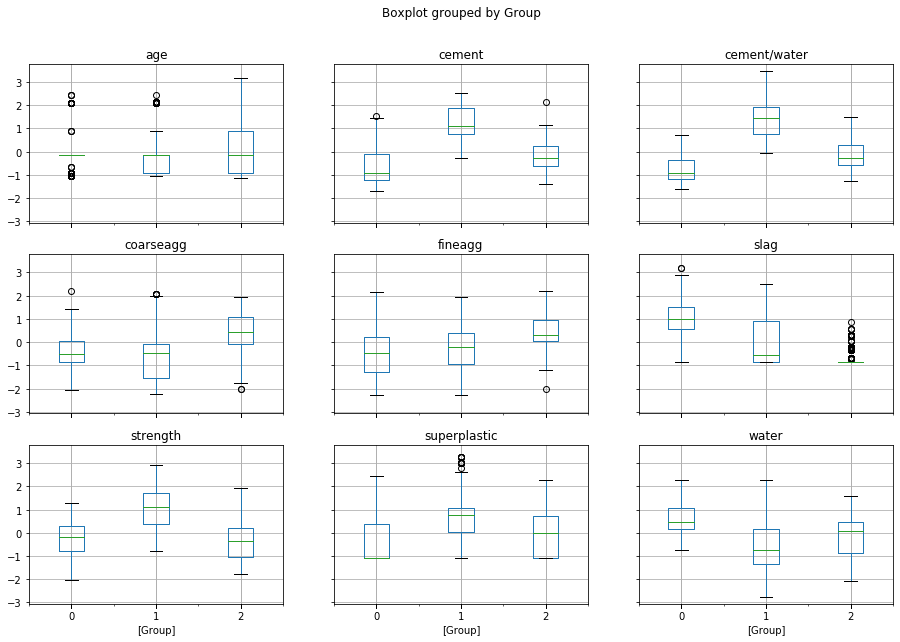

In [55]:
concrete_data_kmeans.boxplot(by='Group', figsize=(15,10))

#### Analysis on each attribute with respect to the group

Text(0.5, 0.98, 'Strength by Cement with groups')

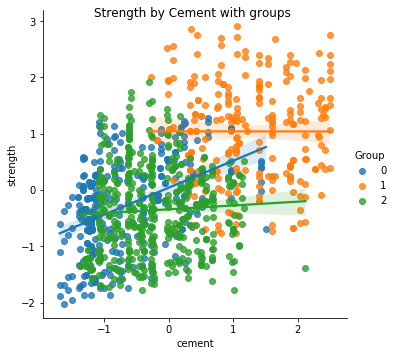

In [56]:
lm = sns.lmplot('cement','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by Cement with groups", fontsize=12)

#### Takeaway :
1. For group 0, the strength increases as cement value increases.
2. For group 1, there is some positive correlation, however, not much.
3. For group 2, the cement value does not seem to affect strength.

Text(0.5, 0.98, 'Strength by Water with groups')

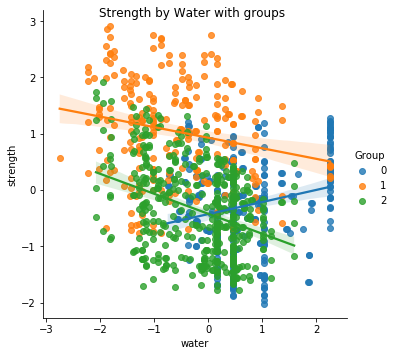

In [57]:
lm = sns.lmplot('water','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by Water with groups", fontsize=12)

#### Takeaway :
1. For group 0, the strength increases slightly with water.
2. For group 1, there is a negative correlation, strength decreases as water increases.
3. Group 2 is also similar to group 1, strength decreases with water. 

Text(0.5, 0.98, 'Strength by slag with groups')

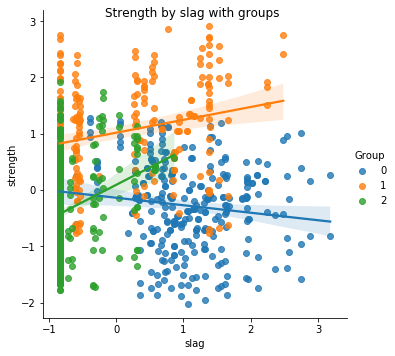

In [58]:
lm = sns.lmplot('slag','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by slag with groups", fontsize=12)

#### Takeaway :
1. The strength decreases slightly with more slag in group 0.
2. For group 1, there is a positive correlation, strength increases as slag increases.
3. Group 2 has slightly positive correlation.  

Text(0.5, 0.98, 'Strength by fineagg with groups')

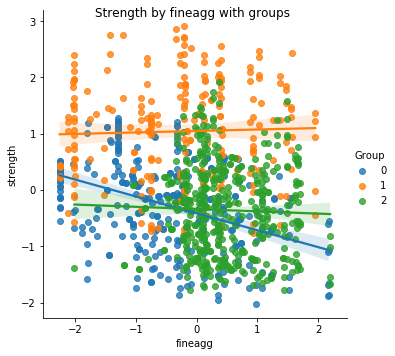

In [59]:
lm= sns.lmplot('fineagg','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by fineagg with groups", fontsize=12)

#### Takeaway :
1. For group 0, the strength has negative correlation with fineagg
2. Strength is nearly flat for group 1 and group 2.

Text(0.5, 0.98, 'Strength by Coarseagg with groups')

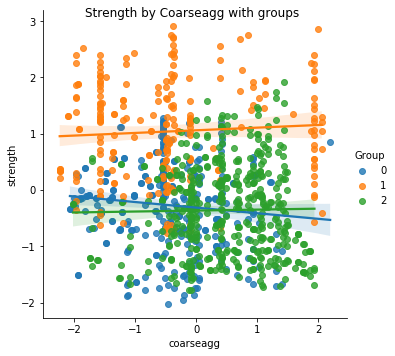

In [60]:
lm = sns.lmplot('coarseagg','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by Coarseagg with groups", fontsize=12)

#### Takeaway :
1. Strength has negative correlation with courseagg in group 0.
2. Strength is nearly flat, with some positive correlation for group 1 and group 2.

Text(0.5, 0.98, 'Strength by superplastic with groups')

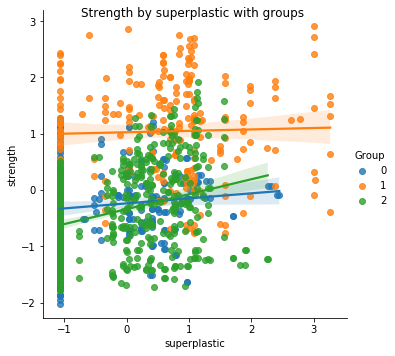

In [61]:
lm = sns.lmplot('superplastic','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by superplastic with groups", fontsize=12)

#### Takeaway :
1. Group 0 has slightly positive correlation with strength
2. Group 1 is clearly positively correlated with Strength
3. Group 2 does not seem to have change in strength with respect to superplastic

Text(0.5, 0.98, 'Strength by age with groups')

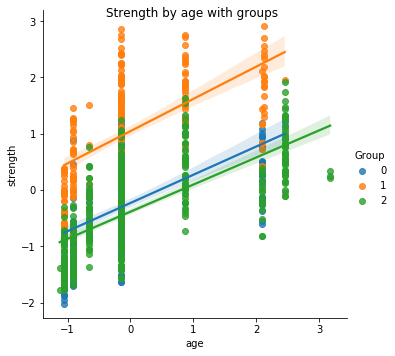

In [62]:
lm = sns.lmplot('age','strength',data=concrete_data_kmeans,hue='Group')
fig = lm.fig 
fig.suptitle("Strength by age with groups", fontsize=12)

#### Takeaway :
1. All three groups show positive correlation for age with strength. 

## 3. Create the models

Use the scaled data to fit multiple models

#### Scale the data

In [63]:
X_scaled = concrete_data_scaled.drop("strength", axis=1)
y = concrete_data_scaled['strength']

#### Split data into 70:30 ratio using scikit learn

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=1)

In [65]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(concrete_data_scaled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(concrete_data_scaled.index)) * 100))

69.95% data is in training set
30.05% data is in test set


#### Fit a simple linear model

In [66]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

maep = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
print("Mean Absolute Error:", maep)
print("Root Mean Squared Error:", rmse)

lr_score = r2_score(y_test,y_pred)
print("Linear Regression R2 Score:",lr_score)

Mean Absolute Error: 0.4287214989536338
Root Mean Squared Error: 0.5605188717982033
Linear Regression R2 Score: 0.6418029072521874


In [67]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regressor.coef_[idx]))

The coefficient for cement is 0.8003114953643936
The coefficient for slag is 0.24128405400994024
The coefficient for water is -0.36296608788100904
The coefficient for superplastic is 0.12328761366073826
The coefficient for coarseagg is -0.11664318451582983
The coefficient for fineagg is -0.1682186242643927
The coefficient for age is 0.5144376235380211
The coefficient for cement/water is -0.2803426387951397


#### Feature importance of selected attributes

Feature cement: 264.350566
Feature slag: 9.652247
Feature water: 49.533217
Feature superplastic: 71.635981
Feature coarseagg: 16.554462
Feature fineagg: 34.546067
Feature age: 241.938908
Feature cement/water: 344.143105


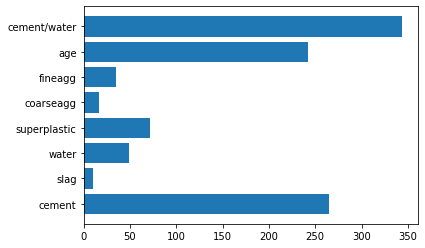

In [68]:
X_train_fs, X_test_fs, fs = select_best_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X_scaled.columns[i], fs.scores_[i]))
# plot the scores
plt.barh([X_scaled.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

'Cement/Water', 'Cement' and 'Age' are the most contributing attributes

#### Fit a Linear Regression Model with PCA

In [69]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.3, random_state=1)

In [70]:
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train_pca)

y_pred = regressor.predict(X_test_pca)

maep = mean_absolute_error(y_test_pca, y_pred)
rmse = mean_squared_error(y_test_pca,y_pred, squared = False)
print("Mean Absolute Error:", maep)
print("Root Mean Squared Error:", rmse)

lr_pca_score = r2_score(y_test_pca,y_pred)
print("Linear Regression with PCA - R2 Score:",lr_pca_score)

Mean Absolute Error: 0.4256443397815593
Root Mean Squared Error: 0.5526596023880618
Linear Regression with PCA - R2 Score: 0.6517773479879001


The linear model with PCA is performing nearly the same as a simple linear model, with lesser number of dimensions.

#### Fit a Ridge Regression Model

In [71]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.76473475  0.23981731 -0.35044718  0.1241171  -0.11534577 -0.1684796
  0.51408628 -0.24263308]


In [72]:
ridge_train_score = ridge.score(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print("Ridge Regression Score:", ridge_score)

Ridge Regression Score: 0.6428049525892805


#### Fit a Lasso Regression Model

In [73]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.54057606  0.23245229 -0.23771133  0.14090642 -0.08294599 -0.14304322
  0.50228052  0.        ]


In [74]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print("Lasso Regression Score:", lasso_score)

Lasso Regression Score: 0.6455810119837826


Both Ridge and Lasso Regressions are performing at par with Non-Regularized Linear Regersison.

#### Fit a Polynomial Regression Model with degree of freedom = 2

In [75]:
## Fit polynomial with degree 2
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [76]:
X_train_poly = poly.fit_transform(X_train)

In [77]:
X_test_poly = poly.fit_transform(X_test)

In [78]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = regressor.predict(X_test_poly)

maep = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
print("Mean Absolute Error:", maep)
print("Root Mean Squared Error:", rmse)

poly_score = r2_score(y_test,y_pred)
print("Polynomial Regression R2 Score:",poly_score)

Mean Absolute Error: 0.3990146202564465
Root Mean Squared Error: 0.511192319800638
Polynomial Regression R2 Score: 0.7020727561808513


Polynomial Regression with degree 2 is performing similar to Reguralized Linear regression model.

#### Fit a Decision Tree Regressor

In [80]:
regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [81]:
y_pred = regressor.predict(X_test)
dt_score = regressor.score(X_test, y_test)
print("Decision Tree Regressor Score:", dt_score)

Decision Tree Regressor Score: 0.6682538872052337


#### Get Feature importances from Decision Tree Regressor

In [82]:
feature_importances = regressor.feature_importances_
feature_names=X_train.columns

<BarContainer object of 8 artists>

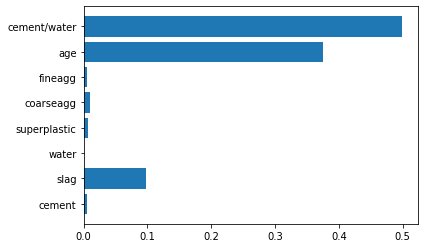

In [83]:
f_imp = pd.DataFrame({'Features' : feature_names,'Feature Importance' : feature_importances})
plt.barh(f_imp['Features'], f_imp['Feature Importance'])

'Age' and 'cement/water' seem to be the most contributing attributes for Decision Tree

#### Fit a Random Forest Regressor

In [84]:
regressor = RandomForestRegressor() 
regressor = regressor.fit(X_train, y_train)

In [85]:
y_pred = regressor.predict(X_test)
rf_score = regressor.score(X_test, y_test)
print("Random Forest Regressor Score:", rf_score)

Random Forest Regressor Score: 0.8841962133658197


#### Fit a Gradient Boosting Regressor

In [86]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [87]:
gb_score = regressor.score(X_test , y_test)
print("Gradient Boosting Regressor Score:", gb_score)

Gradient Boosting Regressor Score: 0.9036043329849722


## 4. Model Tuning

### 4a. Looking at all models that are fit to the data in above. 

In [88]:
model_names = ['Linear Regression', 'Linear Regression PCA', 'Ridge Regression', 'Lasso Regressio', 'Polynomial Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor']

In [89]:
model_scores = [lr_score,lr_pca_score, ridge_score, lasso_score, poly_score,dt_score, rf_score, gb_score ]

In [90]:
model_summary = pd.DataFrame({'Model' : model_names,'Scores' : model_scores })

In [91]:
model_summary

,Model,Scores
0,Linear Regression,0.641803
1,Linear Regression PCA,0.651777
2,Ridge Regression,0.642805
3,Lasso Regressio,0.645581
4,Polynomial Regression,0.702073
5,Decision Tree Regressor,0.668254
6,Random Forest Regressor,0.884196
7,Gradient Boosting Regressor,0.903604


#### Summary : 
1. GradientBoostingRegressor seems to be performing best in this case. 
2. RandomForestRegressor is also showing good performance on the data. 
3. We can consider GradientBoosting Regressor as the better fit, as the Boosting algorithm can be further fine tuned to extract better performance, whereas RandomForest has the tendency to overfit.

#### 4b. Model hyperparameter tuning

#### Selecting GradientBoostingRegressor as the best fit, we can now tune the hyperparameter for the same.

In [92]:
estimator = GradientBoostingRegressor()

In [93]:
estimator.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Generate a grid of parameter configurations

In [94]:
params={'learning_rate':[0.01,.1, .2], 'n_estimators':[100,200,300,400,500],'max_depth':[1,2,3,4,5]}

#### Find the best params using GridSearchCV

In [95]:
grid_search = GridSearchCV(estimator=estimator,param_grid=params, scoring='neg_mean_squared_error', n_jobs=1, cv=10)

In [96]:
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [97]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

#### Fit the best params found from GridSearchCV

In [98]:
gb_regressor = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 300, max_depth= 4)

In [99]:
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
# Score on train data
train_score = gb_regressor.score(X_train , y_train)
train_score

0.9881421573987484

In [101]:
# Score on test data
test_score = gb_regressor.score(X_test , y_test)
test_score

0.9287472585087269

#### The model performance has significantly improved by applying the best selected hyperparameters.

### 4c. Model performance at 95% confidence level

In [102]:
scores = cross_val_score(gb_regressor, X, y, cv=10)
print(scores)

[0.88254695 0.90563581 0.95895444 0.93390543 0.90674384 0.94672108
 0.95566646 0.93568911 0.94358991 0.93937572]


In [103]:
avg_score = scores.mean()
std_score = scores.std()
print("Accuracy: %.3f%% (%.3f%%)" % (avg_score*100.0, std_score*100.0))

Accuracy: 93.088% (2.340%)


#### Calculate accuracy at 95% confidence level : mean (+-) 2*std

In [104]:
lower_confidence = (avg_score - 2*std_score)*100
lower_confidence

88.40837749685157

In [105]:
upper_confidence = (avg_score + 2*std_score)*100
upper_confidence

97.76819732481115

In [106]:
print("Accuracy of GradientBoostingRegressor at 95%% confidence is between %.2f%% and %.2f%%" % (lower_confidence, upper_confidence))

Accuracy of GradientBoostingRegressor at 95% confidence is between 88.41% and 97.77%


## Summary

### We had fit multiple models to the data and identified GradientBoostingRegressor as the best fit model. 
### The model performance can be further improved by hyperparameter tuning and the best fit model results were published. 
### The model performance at 95% confidence level is between 88.41% to 97.77% which is a good fit and an acceptable model. 